In [1]:
# imports
import random

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from gensim import models
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# OPTIONAL FOR GOOGLE COLAB
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# CONSTANTS
FOLDER_PATH = '/content/gdrive/MyDrive/praktikum/'
FILE_PATH_BIN = 'GoogleNews-vectors-negative300.bin'

In [4]:
def prepare_file_path():
  """
  Prepares files with respect to configuration
  :return: (folder path, path of bin file)
  """
  folder_path = FOLDER_PATH
  file_name_bin = FILE_PATH_BIN
  return folder_path, folder_path + file_name_bin

def get_embeddings_of_all_words(bin_file_path):
  """
  Loads the embeddings from the .bin file
  :param bin_file_path: Path of .bin file containing Word2vec embeddings
  :return: Embeddings(vectors) of all words inside .bin file
  """
  return models.KeyedVectors.load_word2vec_format(bin_file_path, binary=True)

In [5]:
def form_similarity_matrix_custom_words(custom_words):
  """
  Computes distances among custom words then plots a similarity matrix (a heatmap)
  :param custom_words: Words for which the similarity matrix will be generated
  :return: None
  """
  _, file_path_bin = prepare_file_path()
  embeddings = get_embeddings_of_all_words(file_path_bin)

  custom_words_embeddings = [embeddings[word] for word in custom_words]
  custom_words_embeddings = np.asarray(custom_words_embeddings)

  n_custom = len(custom_words)
  cosine_similarities = []

  for i in range(n_custom):
    cosine_similarities_list = []
    for j in range(n_custom):
      e1 = custom_words_embeddings[i].reshape(1,-1)
      e2 = custom_words_embeddings[j].reshape(1,-1)

      # compute similarity
      cos_sim_value = cosine_similarity(e1, e2)[0][0]
      # append current similarity
      cosine_similarities_list.append(cos_sim_value)
    cosine_similarities.append(np.asarray(cosine_similarities_list))
  cos_sims = np.asarray(cosine_similarities)

  # generate a heatmap with the similarities
  plt.figure(figsize=(10, 10))
  sn.heatmap(cos_sims, annot=True, yticklabels=custom_words, xticklabels=custom_words)
  plt.show()

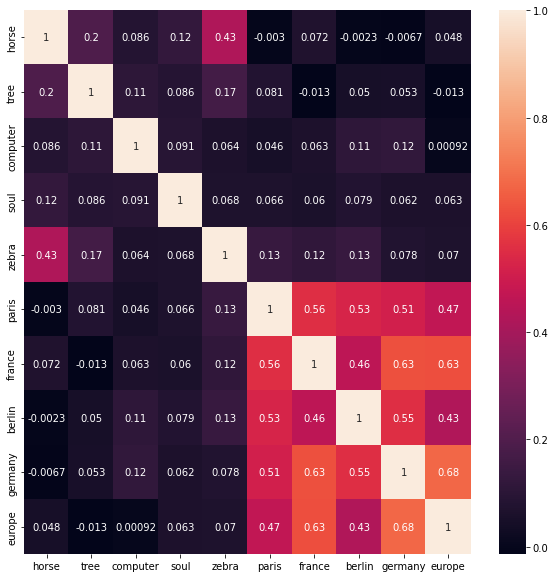

In [6]:
custom_words = ["horse", "tree", "computer", "soul", "zebra", "paris", "france", "berlin", "germany", "europe"]
form_similarity_matrix_custom_words(custom_words)

In [7]:
def get_all_words_and_shuffle(word_embeddings):
  """
  Loads all the words (vocabulary), then returns the shuffled vocabulary
  :param word_embeddings: Word embedding containing vocabulary
  :return: Shuffled words (vocabulary)
  """
  words = word_embeddings.vocab.keys()
  words = list(words)
  random.shuffle(words)
  return words

def save_partial_data(words, embeddings, n):
  """
  Generates two files, one containing embeddings (.npy), one containing words/vocabulary (.txt) with size of n samples
  :param words: Words to be used as base
  :param embeddings: Embeddings to be used as base
  :param n: Number of rows in the data that will generated
  :return: None
  """
  X = []
  partial_words = words[:n]
  for idx, word in enumerate(partial_words):
      X.append(embeddings[word])
  X = np.asarray(X)
  file_name_npy = "word2vec_" + str(n) + ".npy"
  file_path_npy = FOLDER_PATH + file_name_npy
  file_name_txt = "word2vec_" + str(n) + ".txt"
  file_path_txt = FOLDER_PATH + file_name_txt
  np.save(file_path_npy, X)
  with open(file_path_txt, 'w') as fp:
      fp.write('\n'.join(words))
  print(f'Data with {n} samples is generated and saved. File name of embeddings: {file_name_npy} - corresponding words: {file_name_txt}')

In [8]:
_, file_path_bin = prepare_file_path()
all_word_embeddings = get_embeddings_of_all_words(file_path_bin)
all_words = get_all_words_and_shuffle(all_word_embeddings)
for num_rows in [1000, 10000, 20000, 30000]:
  save_partial_data(all_words, all_word_embeddings, n=num_rows)

Data with 1000 samples is generated and saved. File name of embeddings: word2vec_1000.npy - corresponding words: word2vec_1000.txt
Data with 10000 samples is generated and saved. File name of embeddings: word2vec_10000.npy - corresponding words: word2vec_10000.txt
Data with 20000 samples is generated and saved. File name of embeddings: word2vec_20000.npy - corresponding words: word2vec_20000.txt
Data with 30000 samples is generated and saved. File name of embeddings: word2vec_30000.npy - corresponding words: word2vec_30000.txt
